In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import random, os, glob

%matplotlib inline

In [2]:
img = Image.open('test.jpg')

In [3]:
def crop(image):
    
    width = img.size[0]
    height = img.size[1]
    img_cropped = img.crop(
        (
            int(max(0, width*random.uniform(-.10, .10))),
            int(max(0, height*random.uniform(-.10, .10))),
            int(min(width, width-(width*random.uniform(-.10, .10)))),
            int(min(height, height-(height*random.uniform(-.10, .10))))
        )
    )
    img_cropped.load()
    return img_cropped

def brighten(image):  
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(random.normalvariate(1, .2))

def flip(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def contrast(image):  
    enhancer = ImageEnhance.Contrast(img)
    return enhancer.enhance(random.normalvariate(1, .2))

def blur(image):
    return image.filter(ImageFilter.BLUR)

def edge_enhance(image):
    return image.filter(ImageFilter.EDGE_ENHANCE)
    
def smooth(image):
    return image.filter(ImageFilter.SMOOTH)


def random_alteration(image):
    #options = [crop, brighten, blur, edge_enhance, smooth, flip]
    options = [crop, flip]
    fn = random.choice(options)
    return fn(image)

In [4]:
def convert_png_to_jpg(path):
    im = Image.open(path)
    (name, extenstion) = os.path.splitext(path)
    im.save(name +".jpg", "JPEG")
    os.remove(path)

def convert_all_pngs_to_jpg(path):
    for obj in os.listdir(path):
        further_path = os.path.join(path, obj)
        if os.path.isdir(further_path):
            convert_all_pngs_to_jpg(further_path)
        if obj.endswith('.png'):
            convert_png_to_jpg(further_path) 
            
def alter_all_in_folder(path, outpath):
    
    if not os.path.exists(outpath + path):
        os.makedirs(outpath + path)
    for infile in glob.glob(path + "/*.jpg"):
        file, ext = os.path.splitext(infile)
        if random.choice([True, False]):
            continue
        im = random_alteration(Image.open(infile)) 
        im.save(outpath + path + "/1-" + os.path.basename(infile), "JPEG")
        
def alter_all_images(path, outpath):
    for obj in os.listdir(path):
        further_path = os.path.join(path, obj)
        if os.path.isdir(further_path):
            alter_all_in_folder(further_path, outpath)


In [5]:
imageFilePath = 'images/'

alter_all_images(imageFilePath, 'altered/')

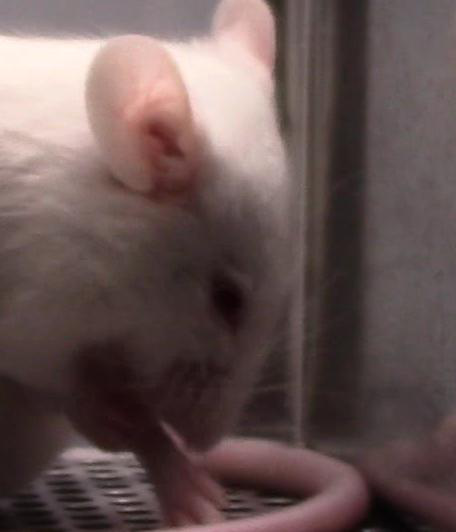

In [6]:
img

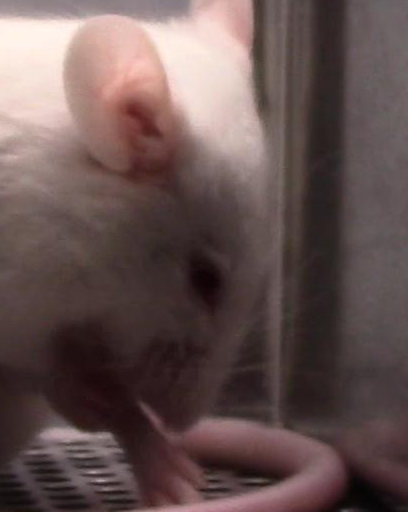

In [7]:
crop(img)

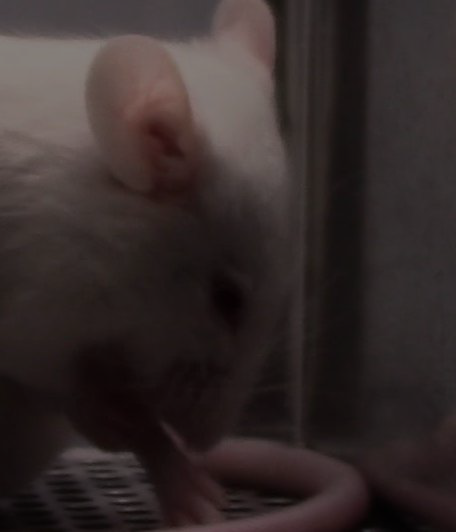

In [8]:
brighten(img)

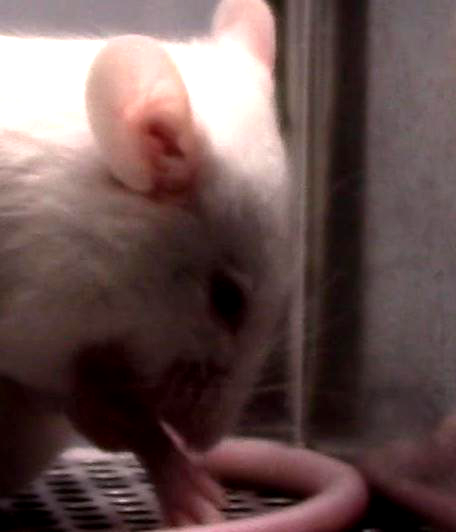

In [9]:
contrast(img)

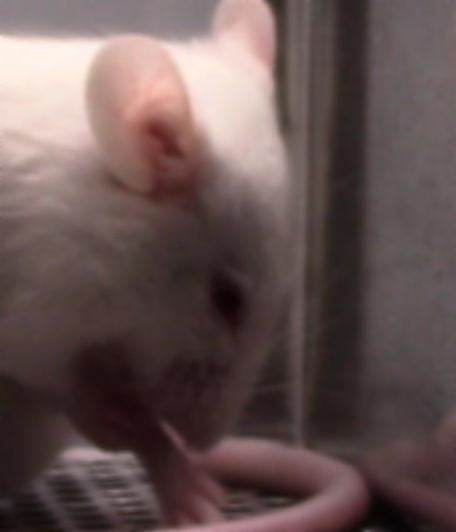

In [10]:
blur(img)

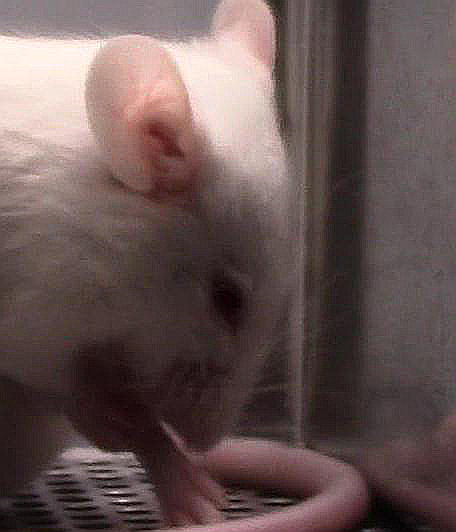

In [11]:
edge_enhance(img)

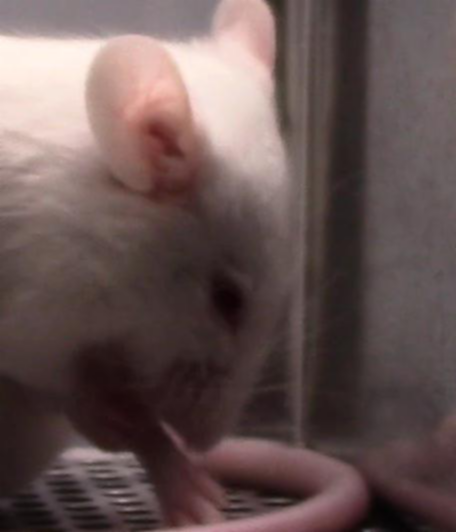

In [12]:
smooth(img)

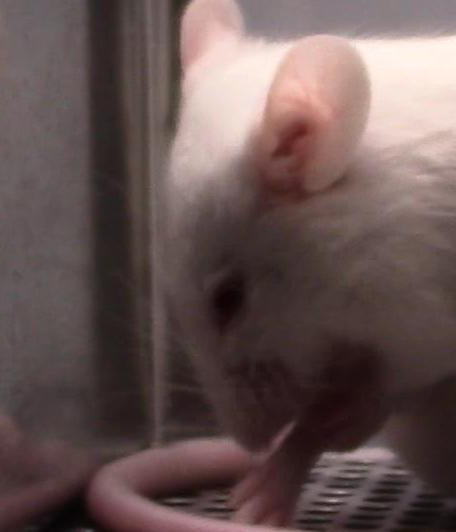

In [13]:
flip(img)